<a href="https://colab.research.google.com/github/Lavrova-anastazia/composites/blob/main/%D0%92%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка датасетов

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Drive/ВКР/X_bp_1.xlsx')
df1.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Drive/ВКР/X_nup_1.xlsx')
df2.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.0,57.0
1,1.0,0.0,4.0,60.0
2,2.0,0.0,4.0,70.0
3,3.0,0.0,5.0,47.0
4,4.0,0.0,5.0,57.0


# Объединение датасетов

In [ ]:
df=pd.merge(df1, df2)
pd.merge(df1, df2, how='inner', on=None)
df.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


**Удаление столбца "Unnamed"**

In [ ]:
df.drop(columns = ['Unnamed: 0'],axis = 1, inplace=True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [ ]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


**Проверка пропусков**

In [ ]:
pd.isnull(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [ ]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

# Гистограммы 

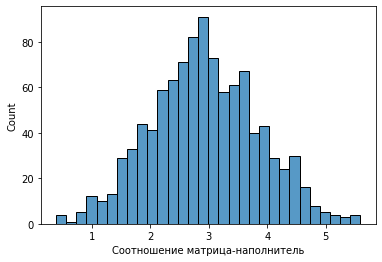

In [ ]:
sns.histplot(df['Соотношение матрица-наполнитель'], kde=False, bins=30)

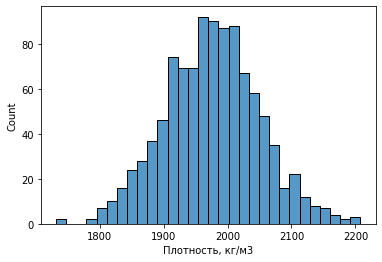

In [ ]:
sns.histplot(df['Плотность, кг/м3'], kde=False, bins=30)

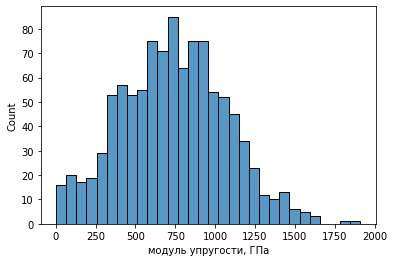

In [ ]:
sns.histplot(df['модуль упругости, ГПа'], kde=False, bins=30)

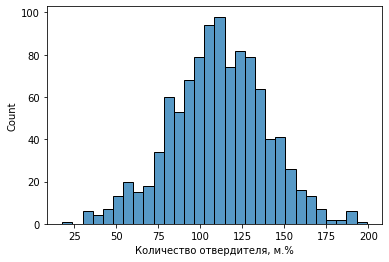

In [ ]:
sns.histplot(df['Количество отвердителя, м.%'], kde=False, bins=30)

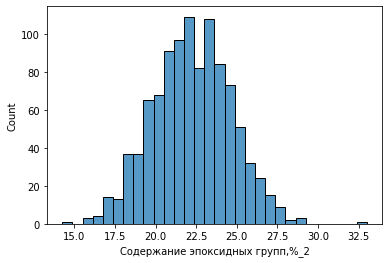

In [ ]:
sns.histplot(df['Содержание эпоксидных групп,%_2'], kde=False, bins=30)

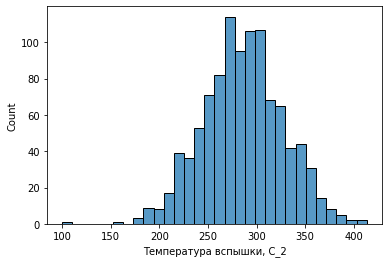

In [ ]:
sns.histplot(df['Температура вспышки, С_2'], kde=False, bins=30)

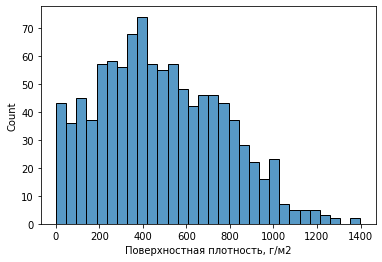

In [ ]:
sns.histplot(df['Поверхностная плотность, г/м2'], kde=False, bins=30)

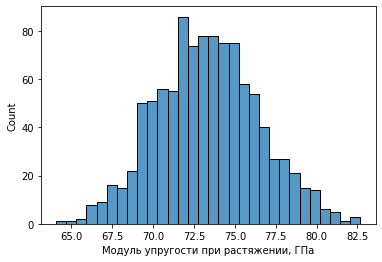

In [ ]:
sns.histplot(df['Модуль упругости при растяжении, ГПа'], kde=False, bins=30)

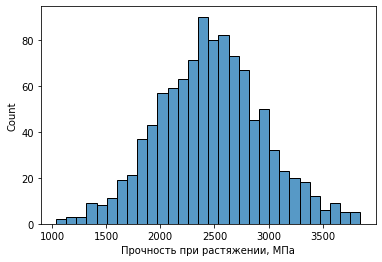

In [ ]:
sns.histplot(df['Прочность при растяжении, МПа'], kde=False, bins=30)

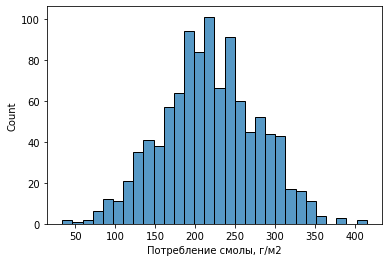

In [ ]:
sns.histplot(df['Потребление смолы, г/м2'], kde=False, bins=30)

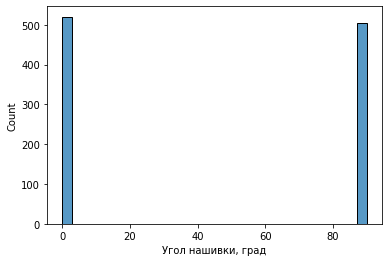

In [ ]:
sns.histplot(df['Угол нашивки, град'], kde=False, bins=30)

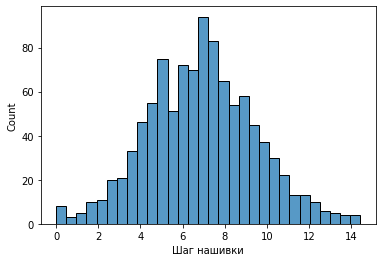

In [ ]:
sns.histplot(df['Шаг нашивки'], kde=False, bins=30)

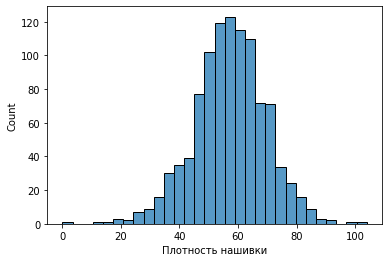

In [ ]:
sns.histplot(df['Плотность нашивки'], kde=False, bins=30)

# Boxplot

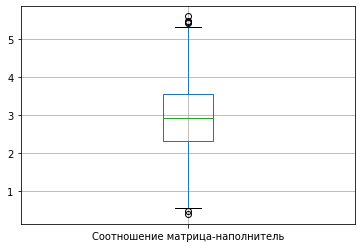

In [ ]:
boxplot = df.boxplot(column=['Соотношение матрица-наполнитель'])

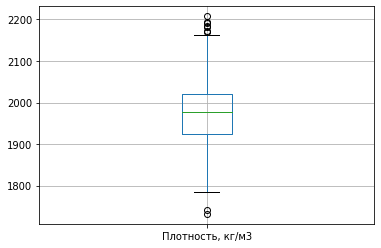

In [ ]:
boxplot = df.boxplot(column=['Плотность, кг/м3'])

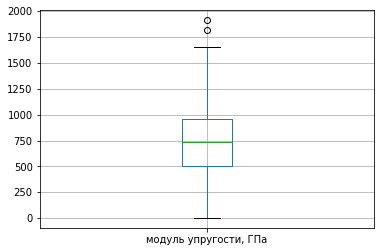

In [ ]:
boxplot = df.boxplot(column=['модуль упругости, ГПа'])

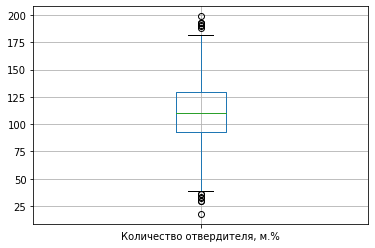

In [ ]:
boxplot = df.boxplot(column=['Количество отвердителя, м.%'])

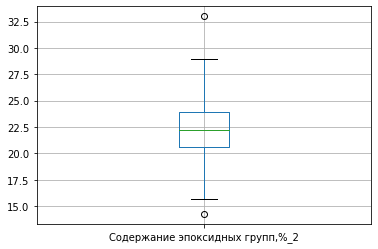

In [ ]:
boxplot = df.boxplot(column=['Содержание эпоксидных групп,%_2'])

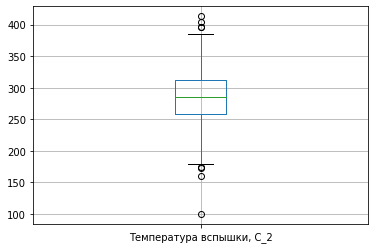

In [ ]:
boxplot = df.boxplot(column=['Температура вспышки, С_2'])

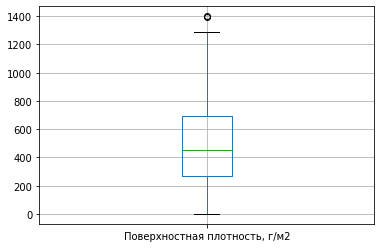

In [ ]:
boxplot = df.boxplot(column=['Поверхностная плотность, г/м2'])

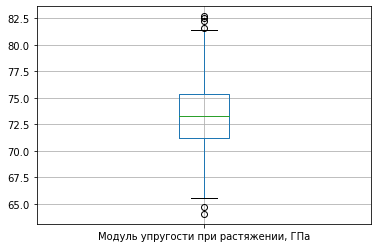

In [ ]:
boxplot = df.boxplot(column=['Модуль упругости при растяжении, ГПа'])

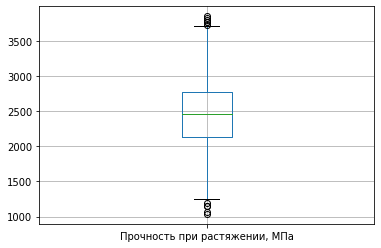

In [ ]:
boxplot = df.boxplot(column=['Прочность при растяжении, МПа'])

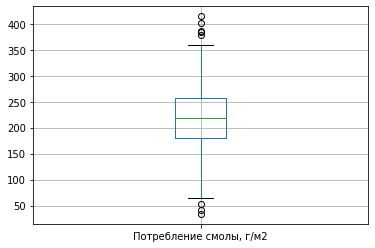

In [ ]:
boxplot = df.boxplot(column=['Потребление смолы, г/м2'])

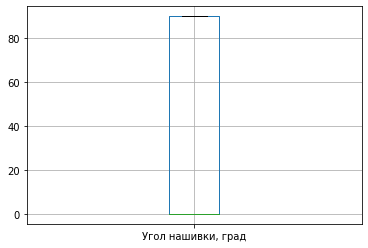

In [ ]:
boxplot = df.boxplot(column=['Угол нашивки, град'])

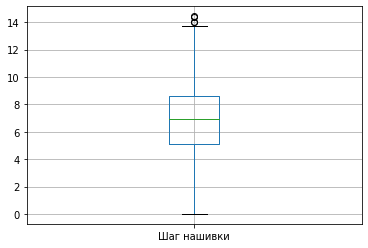

In [ ]:
boxplot = df.boxplot(column=['Шаг нашивки'])

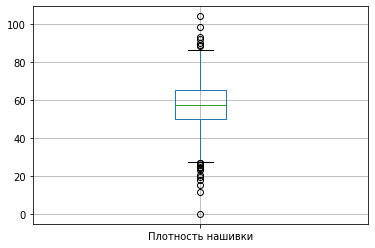

In [ ]:
boxplot = df.boxplot(column=['Плотность нашивки'])

# Попарные графики рассеяния точек

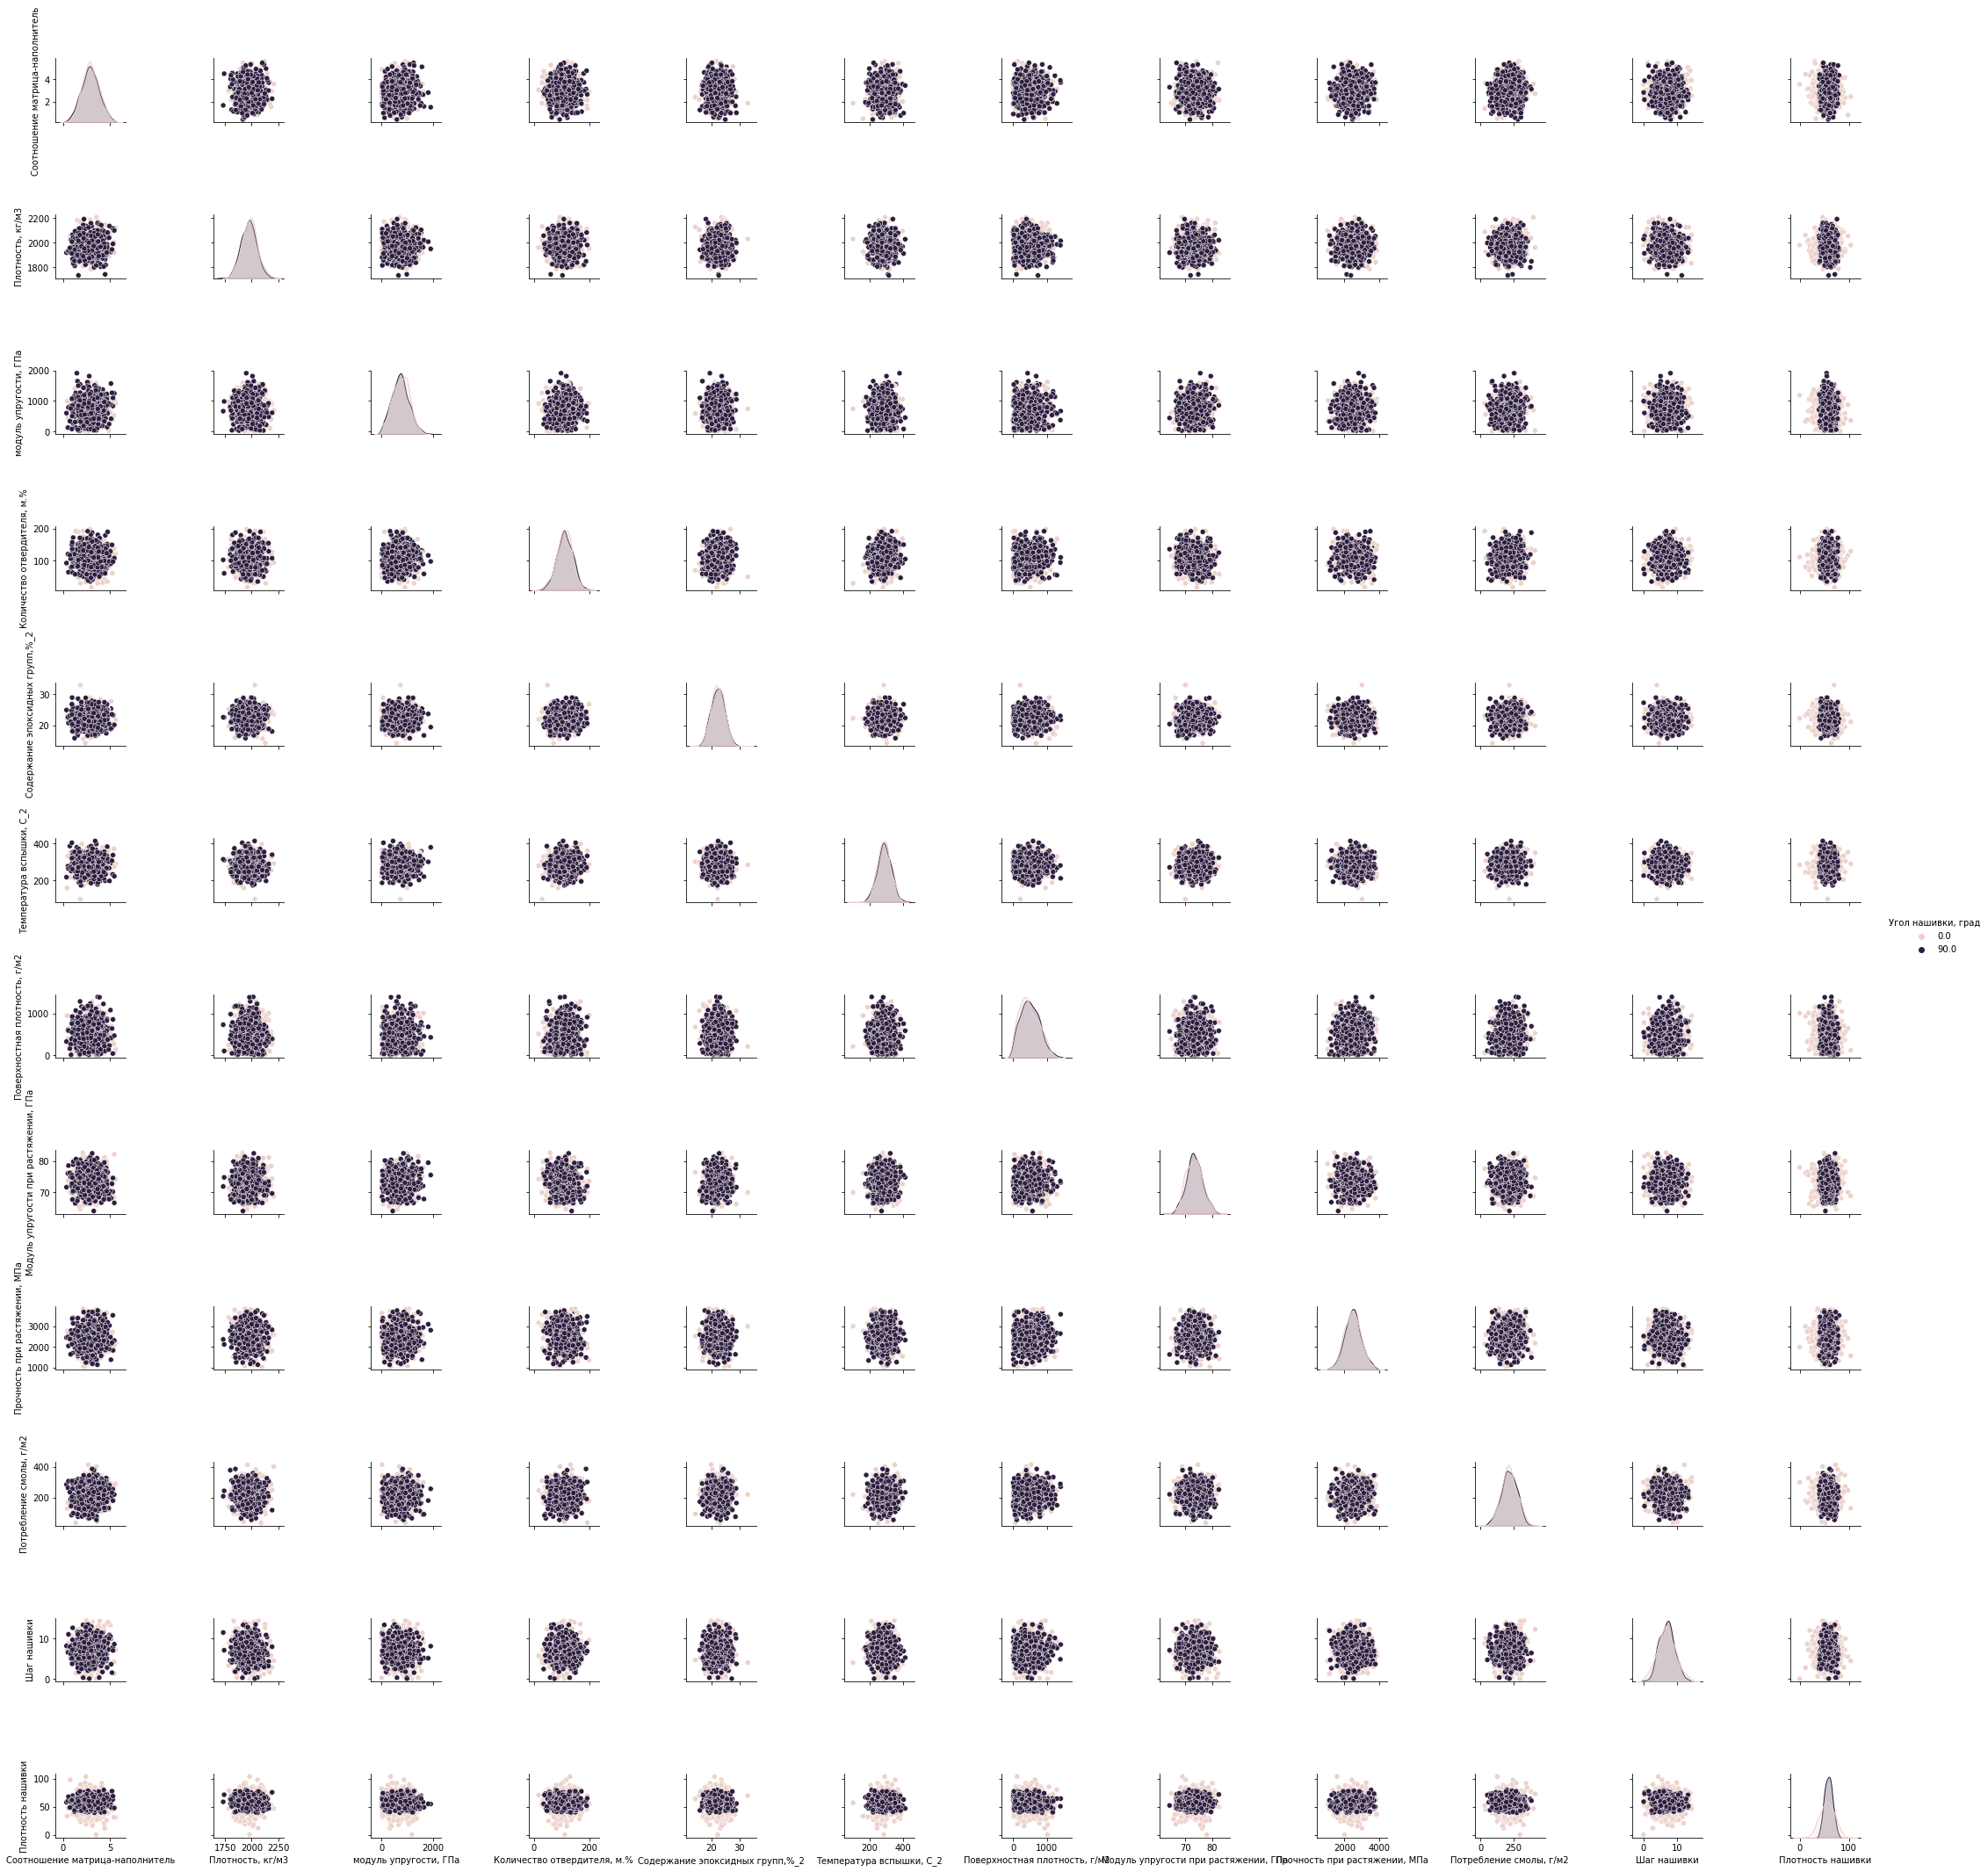

In [ ]:
sns.pairplot(data=df, hue='Угол нашивки, град')

**Тепловая карта корреляции**

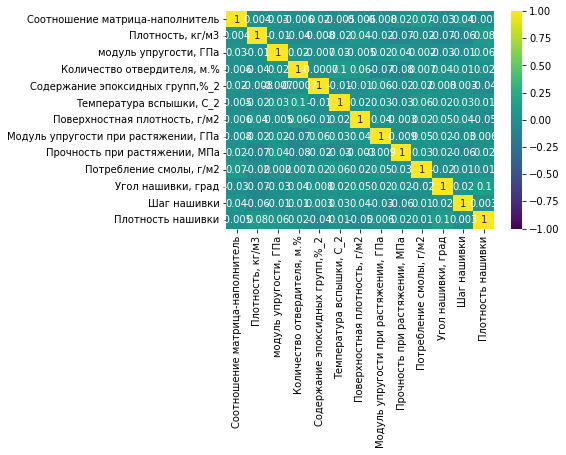

In [ ]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, fmt='.1g', cmap='viridis')

# Выбросы

In [ ]:
def plot_hist(x, title="", xlabel=""):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Количество")
    plt.hist(x, bins = 30)
    plt.show()

In [ ]:
df3 = pd.DataFrame()


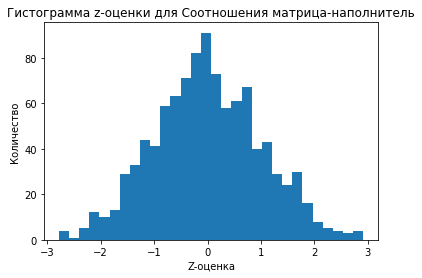

In [ ]:
df3['Соотношение матрица-наполнитель_z'] = (df['Соотношение матрица-наполнитель'] - df['Соотношение матрица-наполнитель'].mean()) / df['Соотношение матрица-наполнитель'].std()

plot_hist(df3['Соотношение матрица-наполнитель_z'], title='Гистограмма z-оценки для Соотношения матрица-наполнитель', xlabel='Z-оценка')

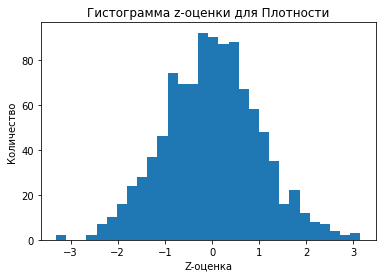

In [ ]:
df3['Плотность, кг/м3_z'] = (df['Плотность, кг/м3'] - df['Плотность, кг/м3'].mean()) / df['Плотность, кг/м3'].std()

plot_hist(df3['Плотность, кг/м3_z'], title='Гистограмма z-оценки для Плотности', xlabel='Z-оценка')

In [ ]:
sum(df3["Плотность, кг/м3_z"] > 3)

1

In [ ]:
sum(df3["Плотность, кг/м3_z"] < -3)

2

In [ ]:
sum(abs(df3["Плотность, кг/м3_z"]) > 3)

3

In [ ]:
df[abs(df3["Плотность, кг/м3_z"]) > 3]

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
100,3.565855,2207.773481,696.149163,94.187613,23.562885,291.803991,384.629393,68.784473,2596.685251,402.163809,0.0,4.512825,46.775469
873,4.484135,1740.657496,984.287951,61.105569,22.552746,310.232466,98.935192,74.824993,2127.387762,243.620389,90.0,7.094243,71.525700
918,1.651444,1731.764635,664.058923,103.299034,22.625733,314.863696,731.002551,71.915252,2368.576114,208.293492,90.0,11.495478,58.843197


Удаляем строки с выбросами для Плотности

In [ ]:
df.drop(labels = [100, 873, 918], axis = 0, inplace = True)

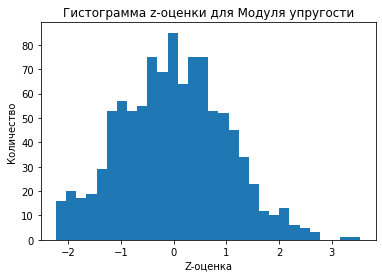

In [ ]:
df3['модуль упругости, ГПа_z'] = (df['модуль упругости, ГПа'] - df['модуль упругости, ГПа'].mean()) / df['модуль упругости, ГПа'].std()

plot_hist(df3['модуль упругости, ГПа_z'], title='Гистограмма z-оценки для Модуля упругости', xlabel='Z-оценка')

In [ ]:
sum(df3["модуль упругости, ГПа_z"] > 3)

2

In [ ]:
sum(df3["модуль упругости, ГПа_z"] < -3)

0

In [ ]:
sum(abs(df3["модуль упругости, ГПа_z"]) > 3)

2

In [ ]:
df[abs(df3["модуль упругости, ГПа_z"]) > 3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
592,1.487419,1949.031040,1911.536477,98.380762,19.447283,379.172951,426.917622,75.573334,2814.321842,256.522741,90.0,8.100387,54.843521
770,2.796648,2007.727318,1815.865170,117.162722,23.688583,300.914088,679.581560,79.518613,3103.000733,179.939702,90.0,5.108723,55.226873


Удаляем строки с выбросами для Модуля упругости

In [ ]:
df.drop(labels = [592, 770],axis = 0, inplace = True)

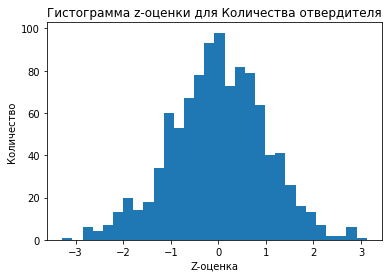

In [ ]:
df3['Количество отвердителя, м.%_z'] = (df['Количество отвердителя, м.%'] - df['Количество отвердителя, м.%'].mean()) / df['Количество отвердителя, м.%'].std()

plot_hist(df3['Количество отвердителя, м.%_z'], title='Гистограмма z-оценки для Количества отвердителя', xlabel='Z-оценка')

In [ ]:
sum(df3["Количество отвердителя, м.%_z"] > 3)

1

In [ ]:
sum(df3["Количество отвердителя, м.%_z"] < -3)

1

In [ ]:
sum(abs(df3["Количество отвердителя, м.%_z"]) > 3)

2

In [ ]:
df[abs(df3["Количество отвердителя, м.%_z"]) > 3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
257,3.027269,1959.011062,916.441601,17.740275,21.965568,279.518623,508.912477,74.278829,3165.165801,245.687212,0.0,5.721782,71.172863
412,2.885855,1951.714931,918.042452,198.953207,26.811285,286.748810,962.345527,73.662132,1379.568514,178.357504,0.0,9.582822,55.278331


Удаляем строки с выбросами для Количества отвердителя

In [ ]:
df.drop(labels = [257, 412],axis = 0, inplace = True)

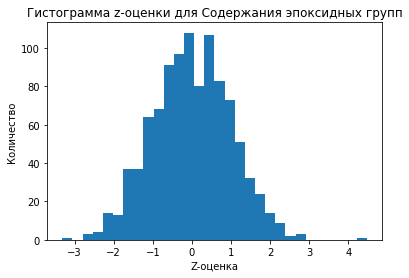

In [ ]:
df3['Содержание эпоксидных групп,%_2_z'] = (df['Содержание эпоксидных групп,%_2'] - df['Содержание эпоксидных групп,%_2'].mean()) / df['Содержание эпоксидных групп,%_2'].std()

plot_hist(df3['Содержание эпоксидных групп,%_2_z'], title='Гистограмма z-оценки для Содержания эпоксидных групп', xlabel='Z-оценка')

In [ ]:
sum(df3["Содержание эпоксидных групп,%_2_z"] > 3)

1

In [ ]:
sum(df3["Содержание эпоксидных групп,%_2_z"] < -3)

1

In [ ]:
sum(abs(df3["Содержание эпоксидных групп,%_2_z"]) > 3)

2

In [ ]:
df[abs(df3["Содержание эпоксидных групп,%_2_z"]) > 3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
298,2.385109,2129.059629,589.782966,70.760954,14.254985,302.043927,676.050552,76.472254,2529.945213,92.307158,0.0,4.650262,63.956692


Удаляем строки с выбросами для Содержания эпоксидных групп

In [ ]:
df.drop(labels = [2, 298],axis = 0, inplace = True)

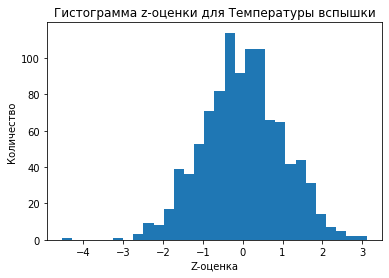

In [ ]:
df3['Температура вспышки, С_2_z'] = (df['Температура вспышки, С_2'] - df['Температура вспышки, С_2'].mean()) / df['Температура вспышки, С_2'].std()

plot_hist(df3['Температура вспышки, С_2_z'], title='Гистограмма z-оценки для Температуры вспышки', xlabel='Z-оценка')

In [ ]:
sum(df3["Температура вспышки, С_2_z"] > 3)

1

In [ ]:
sum(df3["Температура вспышки, С_2_z"] < -3)

2

In [ ]:
sum(abs(df3["Температура вспышки, С_2_z"]) > 3)

3

In [ ]:
df[abs(df3["Температура вспышки, С_2_z"]) > 3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
378,0.463342,1925.610616,992.760436,88.383137,22.147630,160.255843,951.222629,76.210116,2781.540025,127.652751,0.0,7.317168,33.326279
791,3.426368,2028.026074,453.458891,105.674852,22.415611,413.273418,586.715020,74.838137,2334.649515,233.293376,90.0,5.256326,46.966045


Удаляем строки с выбросами для Температуры вспышки

In [ ]:
df.drop(labels = [0, 378, 791],axis = 0, inplace = True)

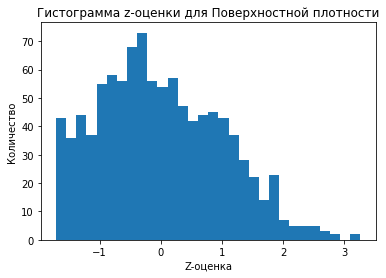

In [ ]:
df3['Поверхностная плотность, г/м2_z'] = (df['Поверхностная плотность, г/м2'] - df['Поверхностная плотность, г/м2'].mean()) / df['Поверхностная плотность, г/м2'].std()

plot_hist(df3['Поверхностная плотность, г/м2_z'], title='Гистограмма z-оценки для Поверхностной плотности', xlabel='Z-оценка')

In [ ]:
sum(df3["Поверхностная плотность, г/м2_z"] > 3)

2

In [ ]:
sum(df3["Поверхностная плотность, г/м2_z"] < -3)

0

In [ ]:
sum(abs(df3["Поверхностная плотность, г/м2_z"]) > 3)

2

In [ ]:
df[abs(df3["Поверхностная плотность, г/м2_z"]) > 3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
692,3.695486,2014.825483,667.332585,110.860146,21.797640,212.021224,1399.542362,73.194617,3583.506884,270.684615,90.0,8.503453,64.597786
718,3.883264,1978.962659,372.566673,94.803958,23.056813,281.289672,1391.032409,73.639983,2649.351334,288.794810,90.0,4.845661,50.952915


Удаляем строки с выбросами для Поверхностной плотности

In [ ]:
df.drop(labels = [692, 718],axis = 0, inplace = True)

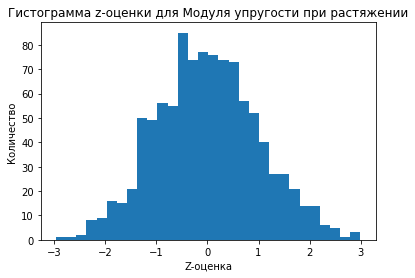

In [ ]:
df3['Модуль упругости при растяжении, ГПа_z'] = (df['Модуль упругости при растяжении, ГПа'] - df['Модуль упругости при растяжении, ГПа'].mean()) / df['Модуль упругости при растяжении, ГПа'].std()

plot_hist(df3['Модуль упругости при растяжении, ГПа_z'], title='Гистограмма z-оценки для Модуля упругости при растяжении', xlabel='Z-оценка')

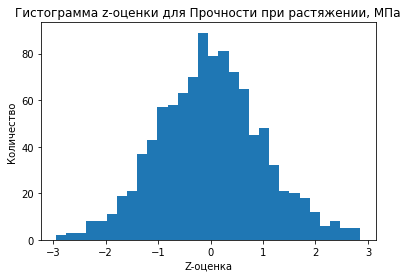

In [ ]:
df3['Прочность при растяжении, МПа_z'] = (df['Прочность при растяжении, МПа'] - df['Прочность при растяжении, МПа'].mean()) / df['Прочность при растяжении, МПа'].std()

plot_hist(df3['Прочность при растяжении, МПа_z'], title='Гистограмма z-оценки для Прочности при растяжении, МПа', xlabel='Z-оценка')

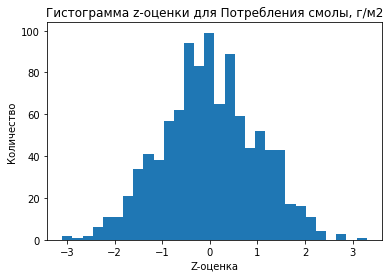

In [ ]:
df3['Потребление смолы, г/м2_z'] = (df['Потребление смолы, г/м2'] - df['Потребление смолы, г/м2'].mean()) / df['Потребление смолы, г/м2'].std()

plot_hist(df3['Потребление смолы, г/м2_z'], title='Гистограмма z-оценки для Потребления смолы, г/м2', xlabel='Z-оценка')

In [ ]:
sum(df3["Потребление смолы, г/м2_z"] > 3)

1

In [ ]:
sum(df3["Потребление смолы, г/м2_z"] < -3)

1

In [ ]:
sum(abs(df3["Потребление смолы, г/м2_z"]) > 3)

2

In [ ]:
df[abs(df3["Потребление смолы, г/м2_z"]) > 3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
211,2.696183,1959.779639,26.827000,132.031952,19.868797,349.726171,527.229431,74.659159,2188.744473,414.590628,0.0,12.287666,73.044781
503,1.367585,2088.013591,923.421474,192.705385,23.119301,251.997689,59.939393,77.627654,2149.657181,33.803026,0.0,8.815040,52.134210


Удаляем строки с выбросами для Потребления смолы

In [ ]:
df.drop(labels = [211, 503],axis = 0, inplace = True)

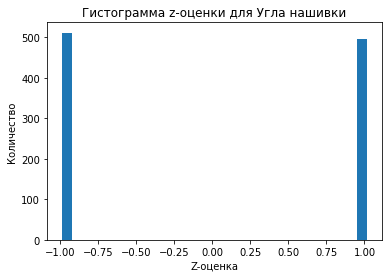

In [ ]:
df3['Угол нашивки, град_z'] = (df['Угол нашивки, град'] - df['Угол нашивки, град'].mean()) / df['Угол нашивки, град'].std()

plot_hist(df3['Угол нашивки, град_z'], title='Гистограмма z-оценки для Угла нашивки', xlabel='Z-оценка')

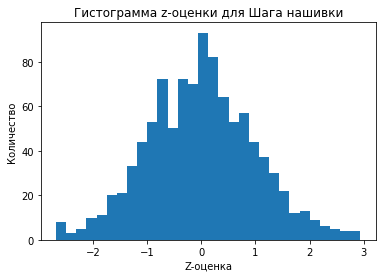

In [ ]:
df3['Шаг нашивки_z'] = (df['Шаг нашивки'] - df['Шаг нашивки'].mean()) / df['Шаг нашивки'].std()

plot_hist(df3['Шаг нашивки_z'], title='Гистограмма z-оценки для Шага нашивки', xlabel='Z-оценка')

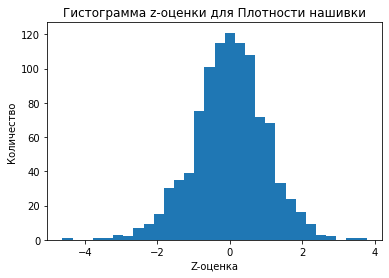

In [ ]:
df3['Плотность нашивки_z'] = (df['Плотность нашивки'] - df['Плотность нашивки'].mean()) / df['Плотность нашивки'].std()

plot_hist(df3['Плотность нашивки_z'], title='Гистограмма z-оценки для Плотности нашивки', xlabel='Z-оценка')

In [ ]:
sum(df3["Плотность нашивки_z"] > 3)

2

In [ ]:
sum(df3["Плотность нашивки_z"] < -3)

5

In [ ]:
sum(abs(df3["Плотность нашивки_z"]) > 3)

7

In [ ]:
df[abs(df3["Плотность нашивки_z"]) > 3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
19,3.532338,1980.000000,1183.000000,111.860000,22.267857,284.615385,1010.000000,78.000000,2000.000000,300.000000,0.0,0.000000,0.000000
41,2.465205,1936.099137,1056.554985,71.294058,24.523381,271.975678,129.077163,66.420794,2868.586527,227.022557,0.0,7.401543,19.250533
140,0.790499,2054.123810,876.794802,116.889391,23.564969,353.561943,643.647660,70.080210,2424.148613,247.193190,0.0,5.506840,98.202603
279,4.434429,2061.918771,328.876626,81.071393,23.213218,244.874100,934.780246,76.238258,2995.952606,178.066150,0.0,2.788476,11.740126
438,3.121963,2011.351029,386.740062,118.954187,23.695821,292.359254,324.058951,76.564019,2741.401228,168.829524,0.0,8.674868,15.416076
461,3.150281,2018.730096,666.071055,95.431804,19.436391,243.658653,1013.463394,75.547226,2418.391967,327.004004,0.0,7.193412,17.934408
464,2.440166,1980.132394,357.938256,130.541848,21.177094,290.618547,119.756192,68.900703,1577.288189,129.038238,0.0,4.447498,103.988901


Удаляем строки с выбросами для Плотности нашивки

In [ ]:
df.drop(labels = [19, 41, 140, 279, 438, 461, 464],axis = 0, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1000 non-null   float64
 1   Плотность, кг/м3                      1000 non-null   float64
 2   модуль упругости, ГПа                 1000 non-null   float64
 3   Количество отвердителя, м.%           1000 non-null   float64
 4   Содержание эпоксидных групп,%_2       1000 non-null   float64
 5   Температура вспышки, С_2              1000 non-null   float64
 6   Поверхностная плотность, г/м2         1000 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 8   Прочность при растяжении, МПа         1000 non-null   float64
 9   Потребление смолы, г/м2               1000 non-null   float64
 10  Угол нашивки, град                    1000 non-null   float64
 11  Шаг нашивки      

# Нормализация данных

In [ ]:
scaler = preprocessing.MinMaxScaler()

names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.275109,0.544652
1,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.365074
2,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.503211
3,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.544652
4,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.16223,0.319194,0.698235,0.517418,0.0,0.344539,0.682789


In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1000 non-null   float64
 1   Плотность, кг/м3                      1000 non-null   float64
 2   модуль упругости, ГПа                 1000 non-null   float64
 3   Количество отвердителя, м.%           1000 non-null   float64
 4   Содержание эпоксидных групп,%_2       1000 non-null   float64
 5   Температура вспышки, С_2              1000 non-null   float64
 6   Поверхностная плотность, г/м2         1000 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 8   Прочность при растяжении, МПа         1000 non-null   float64
 9   Потребление смолы, г/м2               1000 non-null   float64
 10  Угол нашивки, град                    1000 non-null   float64
 11  Шаг нашивки       

In [ ]:
scaled_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.489568,0.467648,0.447024,0.496427,0.493216,0.488654,0.371301,0.497322,0.507902,0.512370,0.496000,0.477193,0.507027
std,0.174687,0.178696,0.198876,0.171089,0.179818,0.174792,0.215155,0.167158,0.172506,0.170432,0.500234,0.177586,0.163634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370964,0.340831,0.302576,0.384097,0.368597,0.371985,0.206374,0.386234,0.390414,0.401220,0.000000,0.351886,0.405037
50%,0.484284,0.472347,0.448525,0.495388,0.492154,0.488205,0.348844,0.492609,0.504890,0.513653,0.000000,0.477999,0.509730
75%,0.608289,0.579727,0.582408,0.613258,0.624396,0.606271,0.535295,0.605138,0.612932,0.625772,1.000000,0.593714,0.612766
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Гистограммы нормализованных данных

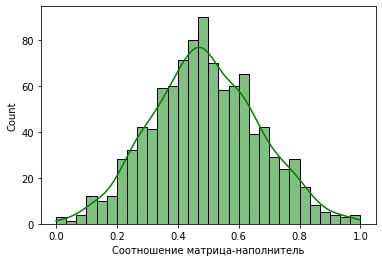

In [ ]:
sns.histplot(scaled_df['Соотношение матрица-наполнитель'], kde=True, bins=30, color='green')

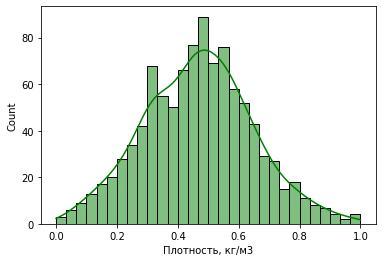

In [ ]:
sns.histplot(scaled_df['Плотность, кг/м3'], kde=True, bins=30, color='green')

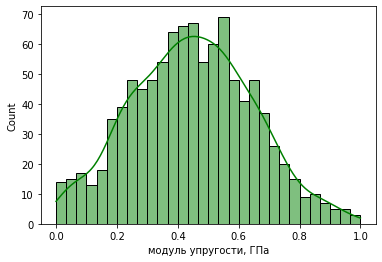

In [ ]:
sns.histplot(scaled_df['модуль упругости, ГПа'], kde=True, bins=30, color='green')

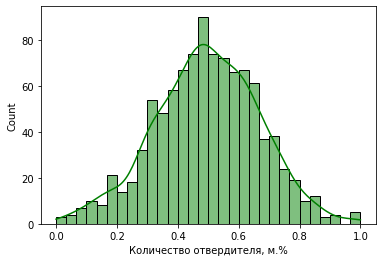

In [ ]:
sns.histplot(scaled_df['Количество отвердителя, м.%'], kde=True, bins=30, color='green')

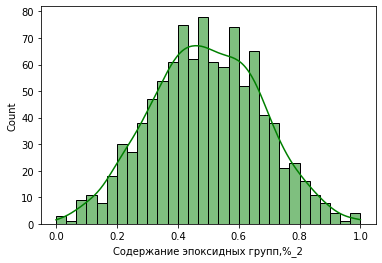

In [ ]:
sns.histplot(scaled_df['Содержание эпоксидных групп,%_2'], kde=True, bins=30, color='green')

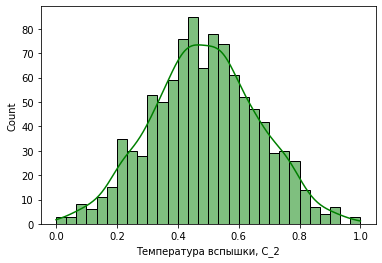

In [ ]:
sns.histplot(scaled_df['Температура вспышки, С_2'], kde=True, bins=30, color='green')

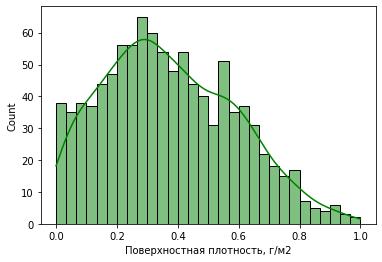

In [ ]:
sns.histplot(scaled_df['Поверхностная плотность, г/м2'], kde=True, bins=30, color='green')

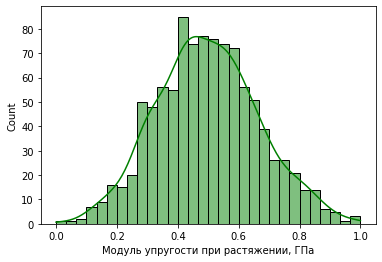

In [ ]:
sns.histplot(scaled_df['Модуль упругости при растяжении, ГПа'], kde=True, bins=30, color='green')

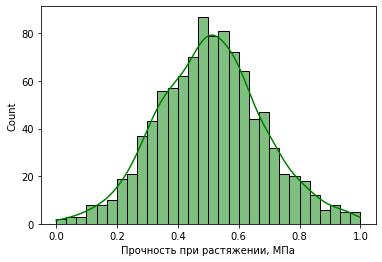

In [ ]:
sns.histplot(scaled_df['Прочность при растяжении, МПа'], kde=True, bins=30, color='green')

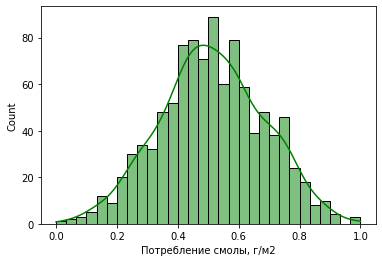

In [ ]:
sns.histplot(scaled_df['Потребление смолы, г/м2'], kde=True, bins=30, color='green')

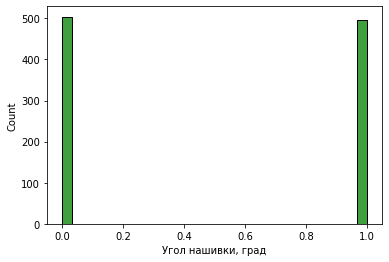

In [ ]:
sns.histplot(scaled_df['Угол нашивки, град'], kde=False, bins=30, color='green')

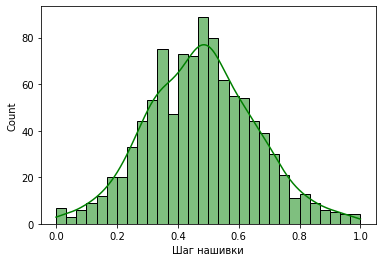

In [ ]:
sns.histplot(scaled_df['Шаг нашивки'], kde=True, bins=30, color='green')

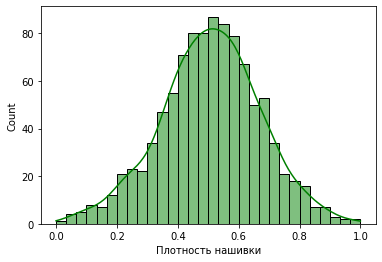

In [ ]:
sns.histplot(scaled_df['Плотность нашивки'], kde=True, bins=30, color='green')

# Прогноз модуля упругости при растяжении

# Линейная регрессионная модель

Линейная регрессионная модель

In [ ]:
y = scaled_df['Модуль упругости при растяжении, ГПа']
X = scaled_df.drop(columns=['Модуль упругости при растяжении, ГПа'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_data_rmse = mean_squared_error(y_test, y_pred, squared=False)
training_data_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"Контролирующая выборка RMSE = {test_data_rmse:.4f}")
print(f"Обучающая выборка RMSE = {training_data_rmse:.4f}")

Контролирующая выборка RMSE = 0.1759
Обучающая выборка RMSE = 0.1616


In [ ]:


kf = KFold(n_splits=10)
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train.iloc[train_index]
  model.fit(X_train_folds, y_train_folds)
  y_train_pred_fold = model.predict(X_train_folds)
  k1 = k+1
  print(f"Split {k1}:")
  print(f"Train RMSE = {mean_squared_error(y_train_folds, y_train_pred_fold, squared=False)}")

Split 1:
Train RMSE = 0.1628166453979998
Split 2:
Train RMSE = 0.16184220656095127
Split 3:
Train RMSE = 0.16082365778668312
Split 4:
Train RMSE = 0.15786179665114095
Split 5:
Train RMSE = 0.16301096521269076
Split 6:
Train RMSE = 0.1599489709321607
Split 7:
Train RMSE = 0.16201838863486326
Split 8:
Train RMSE = 0.15941538040752815
Split 9:
Train RMSE = 0.16337477967237565
Split 10:
Train RMSE = 0.16320181187582


In [ ]:
y = scaled_df['Модуль упругости при растяжении, ГПа']
X = scaled_df.drop(columns=['Модуль упругости при растяжении, ГПа'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_data_rmse = mean_squared_error(y_test, y_pred, squared=False)
training_data_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"Контролирующая выборка RMSE = {test_data_rmse:.4f}")
print(f"Обучающая выборка RMSE = {training_data_rmse:.4f}")

Контролирующая выборка RMSE = 0.1579
Обучающая выборка RMSE = 0.1691


In [ ]:


kf = KFold(n_splits=10)
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train.iloc[train_index]
  model.fit(X_train_folds, y_train_folds)
  y_train_pred_fold = model.predict(X_train_folds)
  k1 = k+1
  print(f"Split {k1}:")
  print(f"Train RMSE = {mean_squared_error(y_train_folds, y_train_pred_fold, squared=False)}")

Split 1:
Train RMSE = 0.16770849788605774
Split 2:
Train RMSE = 0.1680476905450206
Split 3:
Train RMSE = 0.17018802287913323
Split 4:
Train RMSE = 0.16888941648759057
Split 5:
Train RMSE = 0.1716162729677045
Split 6:
Train RMSE = 0.1677606078687224
Split 7:
Train RMSE = 0.16816729620641163
Split 8:
Train RMSE = 0.16832504174131882
Split 9:
Train RMSE = 0.16802799365642895
Split 10:
Train RMSE = 0.17027969507006513


# Случайный лес

In [ ]:
n1 = scaled_df[['Модуль упругости при растяжении, ГПа']]
n2= scaled_df['Угол нашивки, град']

In [ ]:
n1_train, n1_test, n2_train, n2_test = train_test_split(n1, n2, test_size=0.3, random_state=0)

In [ ]:
clf = RandomForestClassifier(n_estimators=100,
                              criterion='entropy', max_depth=30, random_state=0)
clf.fit(n1_train,n2_train)

n2_pred = clf.predict(n1_test)
n2_train_pred = clf.predict(n1_train)


print("Accuracy:", metrics.accuracy_score(n2_test, n2_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(n2_test, n2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(n2_test, n2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(n2_test, n2_pred)))

print('Root Mean Squared Error2:', np.sqrt(metrics.mean_squared_error(n2_train, n2_train_pred)))

Accuracy: 0.5166666666666667
Mean Absolute Error: 0.48333333333333334
Mean Squared Error: 0.48333333333333334
Root Mean Squared Error: 0.695221787153807
Root Mean Squared Error2: 0.06546536707079771


In [ ]:
clf = RandomForestClassifier(n_estimators=1000,
                              criterion='entropy', max_depth=100, random_state=85)
clf.fit(n1_train,n2_train)

n2_pred = clf.predict(n1_test)
n2_train_pred = clf.predict(n1_train)


print("Accuracy:", metrics.accuracy_score(n2_test, n2_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(n2_test, n2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(n2_test, n2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(n2_test, n2_pred)))

print('Root Mean Squared Error2:', np.sqrt(metrics.mean_squared_error(n2_train, n2_train_pred)))

Accuracy: 0.5133333333333333
Mean Absolute Error: 0.4866666666666667
Mean Squared Error: 0.4866666666666667
Root Mean Squared Error: 0.697614984548545
Root Mean Squared Error2: 0.05345224838248488


# AdaBoost

In [ ]:
n_classes = 2
n_estimators = 100
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=n_estimators)

In [ ]:
AB_class = model.fit(n1, n2)

In [ ]:
model.score(n1, n2)

0.997

In [ ]:
mse = mean_squared_error(n2_test, n2_pred)
mse

0.4866666666666667

In [ ]:
mse2 = mean_squared_error(n2_train, n2_train_pred)
mse2

0.002857142857142857

In [ ]:
predictions = model.predict(n1_test)
confusion_matrix(n2_test, predictions)

array([[147,   0],
       [  1, 152]])

In [ ]:
n_classes = 20
n_estimators = 700
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=200), n_estimators=n_estimators)

In [ ]:
AB_class = model.fit(n1, n2)

In [ ]:
model.score(n1, n2)

0.997

In [ ]:
mse = mean_squared_error(n2_test, n2_pred)
mse

0.4866666666666667

In [ ]:
predictions = model.predict(n1_test)
confusion_matrix(n2_test, predictions)

array([[147,   0],
       [  1, 152]])

# Прогноз прочности при растяжении

# Линейная регрессионная модель

In [ ]:
y = scaled_df['Прочность при растяжении, МПа']
X = scaled_df.drop(columns=['Прочность при растяжении, МПа'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_data_rmse = mean_squared_error(y_test, y_pred, squared=False)
training_data_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"Контролирующая выборка RMSE = {test_data_rmse:.4f}")
print(f"Обучающая выборка RMSE = {training_data_rmse:.4f}")

Контролирующая выборка RMSE = 0.1709
Обучающая выборка RMSE = 0.1715


In [ ]:


kf = KFold(n_splits=10)
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train.iloc[train_index]
  model.fit(X_train_folds, y_train_folds)
  y_train_pred_fold = model.predict(X_train_folds)
  k1 = k+1
  print(f"Split {k1}:")
  print(f"Train RMSE = {mean_squared_error(y_train_folds, y_train_pred_fold, squared=False)}")

Split 1:
Train RMSE = 0.17110184676926507
Split 2:
Train RMSE = 0.17260674505601925
Split 3:
Train RMSE = 0.1741302114714665
Split 4:
Train RMSE = 0.17187781317083586
Split 5:
Train RMSE = 0.17099118463521754
Split 6:
Train RMSE = 0.1690133620021166
Split 7:
Train RMSE = 0.16980681495492694
Split 8:
Train RMSE = 0.17163204522501876
Split 9:
Train RMSE = 0.17186610334602462
Split 10:
Train RMSE = 0.16988083686503716


In [ ]:
y = scaled_df['Прочность при растяжении, МПа']
X = scaled_df.drop(columns=['Прочность при растяжении, МПа'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_data_rmse = mean_squared_error(y_test, y_pred, squared=False)
training_data_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"Контролирующая выборка RMSE = {test_data_rmse:.4f}")
print(f"Обучающая выборка RMSE = {training_data_rmse:.4f}")

Контролирующая выборка RMSE = 0.1647
Обучающая выборка RMSE = 0.1743


In [ ]:

kf = KFold(n_splits=10)
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train.iloc[train_index]
  model.fit(X_train_folds, y_train_folds)
  y_train_pred_fold = model.predict(X_train_folds)
  k1 = k+1
  print(f"Split {k1}:")
  print(f"Train RMSE = {mean_squared_error(y_train_folds, y_train_pred_fold, squared=False)}")

Split 1:
Train RMSE = 0.1748456073696871
Split 2:
Train RMSE = 0.17361614330641162
Split 3:
Train RMSE = 0.17415348633330435
Split 4:
Train RMSE = 0.17190092559856757
Split 5:
Train RMSE = 0.17505020460040308
Split 6:
Train RMSE = 0.17390769032017314
Split 7:
Train RMSE = 0.17592909312626334
Split 8:
Train RMSE = 0.17451810703255277
Split 9:
Train RMSE = 0.1727825669265723
Split 10:
Train RMSE = 0.1742539624508467


# Случайный лес

In [ ]:
p1 = scaled_df[['Прочность при растяжении, МПа']]
p2= scaled_df['Угол нашивки, град']

In [ ]:
p1_train, p1_test, p2_train, p2_test = train_test_split(p1, p2, test_size=0.7, random_state=0)

In [ ]:
clf = RandomForestClassifier(n_estimators=100,
                              criterion='entropy', max_depth=30, random_state=0)
clf.fit(p1_train,p2_train)

p2_pred = clf.predict(p1_test)
p2_train_pred = clf.predict(p1_train)

print("Accuracy:", metrics.accuracy_score(p2_test, p2_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(p2_test, p2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(p2_test, p2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(p2_test, p2_pred)))

print('Root Mean Squared Error2:', np.sqrt(metrics.mean_squared_error(p2_train, p2_train_pred)))

Accuracy: 0.48
Mean Absolute Error: 0.52
Mean Squared Error: 0.52
Root Mean Squared Error: 0.7211102550927979
Root Mean Squared Error2: 0.05773502691896258


In [ ]:
clf = RandomForestClassifier(n_estimators=500,
                              criterion='entropy', max_depth=50, random_state=0)
clf.fit(p1_train,p2_train)

p2_pred = clf.predict(p1_test)
p2_train_pred = clf.predict(p1_train)

print("Accuracy:", metrics.accuracy_score(p2_test, p2_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(p2_test, p2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(p2_test, p2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(p2_test, p2_pred)))

print('Root Mean Squared Error2:', np.sqrt(metrics.mean_squared_error(p2_train, p2_train_pred)))

Accuracy: 0.48428571428571426
Mean Absolute Error: 0.5157142857142857
Mean Squared Error: 0.5157142857142857
Root Mean Squared Error: 0.7181324987175317
Root Mean Squared Error2: 0.05773502691896258


# AdaBoost

In [ ]:
n_classes = 5
n_estimators = 100
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=n_estimators)

In [ ]:
AB_class = model.fit(p1, p2)

In [ ]:
model.score(p1, p2)

0.763

In [ ]:
mse = mean_squared_error(p2_test, p2_pred)
mse

0.5157142857142857

In [ ]:
mse2 = mean_squared_error(p2_train, p2_train_pred)
mse2

0.0033333333333333335

In [ ]:
predictions = model.predict(p1_test)
confusion_matrix(p2_test, predictions)

array([[244, 112],
       [ 54, 290]])

In [ ]:
n_classes = 10
n_estimators = 500

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=n_estimators)

In [ ]:
AB_class = model.fit(p1, p2)

In [ ]:
model.score(p1, p2)

0.997

In [ ]:
mse = mean_squared_error(p2_test, p2_pred)
mse

0.5157142857142857

In [ ]:
mse2 = mean_squared_error(n2_train, n2_train_pred)
mse2

0.002857142857142857

In [ ]:
predictions = model.predict(p1_test)
confusion_matrix(p2_test, predictions)

array([[356,   0],
       [  2, 342]])

# Нейронная сеть

In [ ]:
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical




from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend()
    plt.grid(True)

In [ ]:
X = scaled_df[['Соотношение матрица-наполнитель']]
y= scaled_df['Угол нашивки, град']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(700, 1)

In [ ]:
y_train.shape

(700,)

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train.shape

(700, 10)

In [ ]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
input_shape = (X_train.shape[1])

In [ ]:
input_shape

1

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(64, activation="relu"),      
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 64)                128       
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 778
Trainable params: 778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train.shape

(700, 1)

In [ ]:
batch_size = 64
epochs = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
10/10 [==============================] - 1s 29ms/step - loss: 2.2669 - accuracy: 0.1730 - val_loss: 2.2147 - val_accuracy: 0.4286
Epoch 2/30
10/10 [==============================] - 0s 8ms/step - loss: 2.1688 - accuracy: 0.5032 - val_loss: 2.1192 - val_accuracy: 0.4286
Epoch 3/30
10/10 [==============================] - 0s 6ms/step - loss: 2.0735 - accuracy: 0.5032 - val_loss: 2.0240 - val_accuracy: 0.4286
Epoch 4/30
10/10 [==============================] - 0s 7ms/step - loss: 1.9774 - accuracy: 0.5032 - val_loss: 1.9266 - val_accuracy: 0.4286
Epoch 5/30
10/10 [==============================] - 0s 7ms/step - loss: 1.8791 - accuracy: 0.5032 - val_loss: 1.8260 - val_accuracy: 0.4286
Epoch 6/30
10/10 [==============================] - 0s 8ms/step - loss: 1.7774 - accuracy: 0.5032 - val_loss: 1.7210 - val_accuracy: 0.4286
Epoch 7/30
10/10 [==============================] - 0s 5ms/step - loss: 1.6723 - accuracy: 0.5032 - val_loss: 1.6129 - val_accuracy: 0.4286
Epoch 8/30
10/10 [=

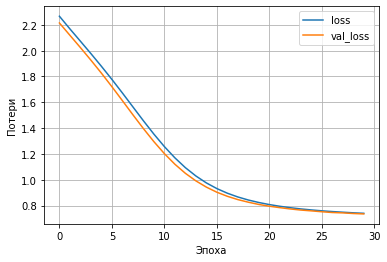

In [ ]:
plot_loss(history)